# Packages

In [5]:
import sys
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import sklearn.metrics
from sklearn.model_selection import train_test_split
import random
import cebra
from cebra import CEBRA
import cebra.grid_search
import time
import joblib as jl
from matplotlib.collections import LineCollection
import cebra.integrations.plotly
import os
import torch
%matplotlib inline

In [6]:
output_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/training/output"
model_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/visualization/models_with_tone"
source_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/training/data_with_tone"
output_dir_tone_only = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/training/output_with_tone_active"

animal_id = '2N6'

In [7]:
import matplotlib as mpl
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.color'] = 'k'
plt.rcParams['svg.fonttype'] = 'none'

# 1. Dataset

In [8]:
Dt = pd.read_csv(os.path.join(source_dir, f'{animal_id}.csv'), index_col= 0)
# Split
Y = Dt.iloc[:, 0:9]
X = Dt.iloc[:, 9:]
# View data
Dt

Timepoint         Time     Speed  Freezing  In Food Area  \
0             1     0.503476  0.033189       0.0           1.0   
1             2     1.541000  0.037854       0.0           1.0   
2             3     2.552700  0.031945       0.0           1.0   
3             4     3.564800  0.030437       0.0           1.0   
4             5     4.577300  0.036552       0.0           1.0   
...         ...          ...       ...       ...           ...   
1765       1766  1770.098000  0.032000       0.0           1.0   
1766       1767  1770.098000  0.032000       0.0           1.0   
1767       1768  1770.098000  0.032000       0.0           1.0   
1768       1769  1770.098000  0.032000       0.0           1.0   
1769       1770  1770.098000  0.032000       0.0           1.0   

      In Hidden Area  Bar Press active  Miniscope record active  Tone active  \
0                0.0          0.404298                 0.484737          0.0   
1                0.0          0.000000                 0.483504          0.0   
2                0.0          0.000000                 0.506131          0.0   
3                0.0          0.000000                 0.503749          0.0   
4                0.0          0.000000                 0.533034          0.0   
...              ...               ...                      ...          ...   
1765             0.0          0.000000                 1.000000          0.0   
1766             0.0          0.000000                 1.000000          0.0   
1767             0.0          0.000000                 1.000000          0.0   
1768             0.0          0.000000                 1.000000          0.0   
1769             0.0          0.000000                 1.000000          0.0   

             0  ...        105       106       107       108       109  \
0     0.000000  ...   0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  ...   0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  ...   0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  ...   0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  ...   0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...  ...        ...       ...       ...       ...       ...   
1765  0.465820  ...  12.268571  0.020547  5.303245  1.382171  1.253797   
1766  0.435238  ...  11.843147  0.018865  5.274349  1.265059  1.089541   
1767  0.406665  ...  11.832817  0.017321  4.939243  1.157869  0.946804   
1768  0.379967  ...  13.299452  0.015903  4.625428  1.059762  0.822766   
1769  0.354427  ...  12.550375  0.014571  4.324528  0.967855  0.712532   

            110       111       112       113       114  
0      0.000000  0.000000  0.000000  0.000000  0.000000  
1      0.000000  0.000000  0.000000  0.000000  0.000000  
2      0.000000  0.000000  0.000000  0.000000  0.000000  
3      0.000000  0.000000  0.000000  0.000000  0.000000  
4      0.000000  2.555697  0.000000  0.000000  0.000000  
...         ...       ...       ...       ...       ...  
1765  12.874539  0.000898  0.062508  0.021159  0.227671  
1766  12.298258  0.000790  0.057494  0.018038  0.216932  
1767  11.747771  0.000696  0.052881  0.015377  0.206700  
1768  11.221925  0.000612  0.048639  0.013109  0.196950  
1769  10.707448  0.000537  0.044645  0.011132  0.187435  

[1770 rows x 124 columns]

In [9]:
X

0         1         2         3         4         5  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.098338  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.177742  0.000000  0.000000  0.000000   
4     0.000000  0.000000  1.830645  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...   
1765  0.465820  0.000012  0.091607  0.064932  0.049717  3.297028   
1766  0.435238  0.000011  0.082245  0.044564  0.046371  2.872533   
1767  0.406665  0.000010  0.073840  0.030585  0.043250  2.502692   
1768  0.379967  0.000008  0.066293  0.020991  0.040339  2.180468   
1769  0.354427  0.000007  0.059361  0.014280  0.037560  1.893350   

                 6    7          8         9  ...        105       106  \
0     0.000000e+00  0.0   1.970130  0.000000  ...   0.000000  0.000000   
1     0.000000e+00  0.0  13.053889  0.000000  ...   0.000000  0.000000   
2     0.000000e+00  0.0  13.479717  0.000000  ...   0.000000  0.000000   
3     0.000000e+00  0.0  14.391106  0.000000  ...   0.000000  0.000000   
4     8.578416e-01  0.0  15.494152  0.000000  ...   0.000000  0.000000   
...            ...  ...        ...       ...  ...        ...       ...   
1765  6.185039e-09  0.0   8.377986  0.154059  ...  12.268571  0.020547   
1766  0.000000e+00  0.0   7.795587  0.139116  ...  11.843147  0.018865   
1767  0.000000e+00  0.0   7.206373  0.125623  ...  11.832817  0.017321   
1768  0.000000e+00  0.0   6.661694  0.113439  ...  13.299452  0.015903   
1769  0.000000e+00  0.0   7.890469  0.102180  ...  12.550375  0.014571   

           107       108       109        110       111       112       113  \
0     0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000   0.000000  2.555697  0.000000  0.000000   
...        ...       ...       ...        ...       ...       ...       ...   
1765  5.303245  1.382171  1.253797  12.874539  0.000898  0.062508  0.021159   
1766  5.274349  1.265059  1.089541  12.298258  0.000790  0.057494  0.018038   
1767  4.939243  1.157869  0.946804  11.747771  0.000696  0.052881  0.015377   
1768  4.625428  1.059762  0.822766  11.221925  0.000612  0.048639  0.013109   
1769  4.324528  0.967855  0.712532  10.707448  0.000537  0.044645  0.011132   

           114  
0     0.000000  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.000000  
...        ...  
1765  0.227671  
1766  0.216932  
1767  0.206700  
1768  0.196950  
1769  0.187435  

[1770 rows x 115 columns]

# 2. Model setup

## (1). Train test split

In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2024)

# Sort dataset by row index
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

## (2). Hyperparameter setup

distance = 'cosine'
time_offsets = 10
batch_size = None
learning_rate = 0.001
conditional = 'time_delta'
output_dimension = 3
num_hidden_units = 50
max_iterations = 10000
temperature = 1

# 3. Model building

## (1). [Freezing, In Hidden Area]

## Best Model Hyperparameters

In [9]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 1) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 1) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 1) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 1) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 1) {animal_id}.csv'), index_col=0)

In [16]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence[modelPerformence.loc[:, 'output_dimension']==3].loc[:, 'Accuracy_Testing'])
# Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
5   cosine             auto            10         NaN           0.01   

  conditional  output_dimension  num_hidden_units  max_iterations  \
5  time_delta                 3                75            7500   

   Accuracy_Testing  
5          6.760576

In [17]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()


### These hyperparameters are used to build up models which only vary a parameter for temperature

In [18]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb1 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb1 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb1 = cebra_behavior_model_comb1.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb1 =CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb1 = cebra_behavior_model_00001_comb1.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb1 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb1 = cebra_behavior_model_01_comb1.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb1 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb1 = cebra_behavior_model_2_comb1.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb1 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb1 = cebra_behavior_model_3_comb1.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb1 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb1 = cebra_behavior_model_5_comb1.transform(X_train)

  0%|          | 0/10000 [00:00<?, ?it/s]/work/09117/xz6783/ls6/Anaconda/envs/cebra/lib/python3.8/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/work/09117/xz6783/ls6/Anaconda/envs/cebra/lib/python3.8/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
pos: -0.6648 neg:  7.5948 total:  6.9300 temperature:  1.0000: 100%|██████████| 10000/10000 [01:01<00:00, 163.51it/s]
/work/09117/xz

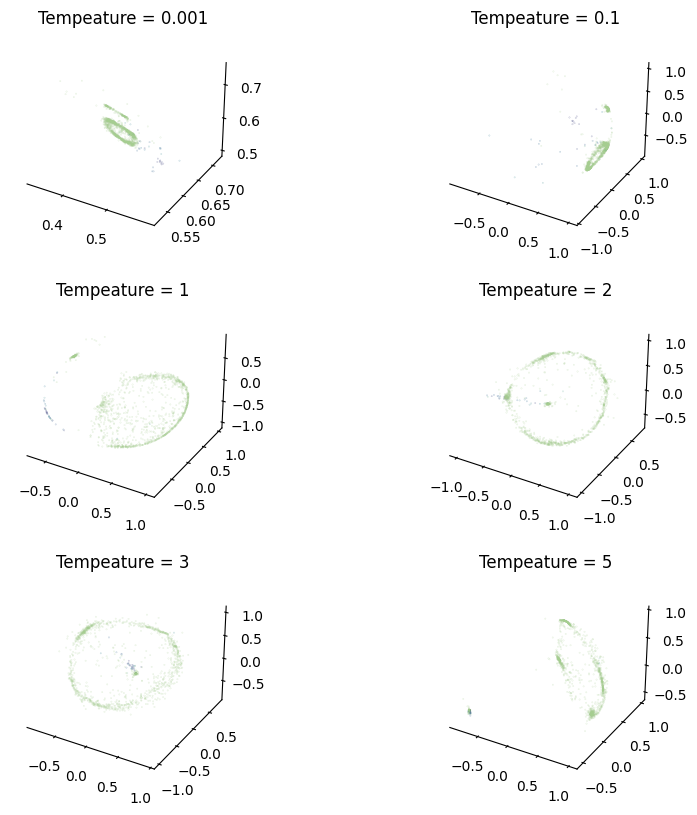

In [19]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb1,
                                                           embedding_labels = y_train.iloc[:, 3],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "crest")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb1,
                                                           embedding_labels = y_train.iloc[:, 3],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "crest")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb1,
                                                           embedding_labels = y_train.iloc[:, 3],
                                                           title = "Tempeature = 1",
                                                           cmap = "crest")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb1,
                                                           embedding_labels = y_train.iloc[:, 3],
                                                           title = "Tempeature = 2",
                                                           cmap = "crest")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb1,
                                                           embedding_labels = y_train.iloc[:, 3],
                                                           title = "Tempeature = 3",
                                                           cmap = "crest")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb1,
                                                           embedding_labels = y_train.iloc[:, 3],
                                                           title = "Tempeature = 5",
                                                           cmap = "crest")

fig.show()

In [11]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb1 = cebra_time_model_025_comb1.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb1 = cebra_time_model_05_comb1.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb1 = cebra_time_model_075_comb1.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb1 = cebra_time_model_125_comb1.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb1 = cebra_time_model_15_comb1.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb1 = cebra_time_model_175_comb1.transform(X_train)

pos: -2.3801 neg:  8.6763 total:  6.2961 temperature:  0.2500: 100%|██████████| 10000/10000 [00:43<00:00, 230.53it/s]
pos: -1.1201 neg:  7.7466 total:  6.6265 temperature:  0.5000: 100%|██████████| 10000/10000 [00:44<00:00, 223.86it/s]
pos: -0.7604 neg:  7.5417 total:  6.7813 temperature:  0.7500: 100%|██████████| 10000/10000 [00:44<00:00, 223.64it/s]
pos: -0.4559 neg:  7.4049 total:  6.9490 temperature:  1.2500: 100%|██████████| 10000/10000 [00:44<00:00, 223.44it/s]
pos: -0.3903 neg:  7.3779 total:  6.9877 temperature:  1.5000: 100%|██████████| 10000/10000 [00:44<00:00, 224.80it/s]
pos: -0.3334 neg:  7.3595 total:  7.0260 temperature:  1.7500: 100%|██████████| 10000/10000 [00:43<00:00, 229.20it/s]


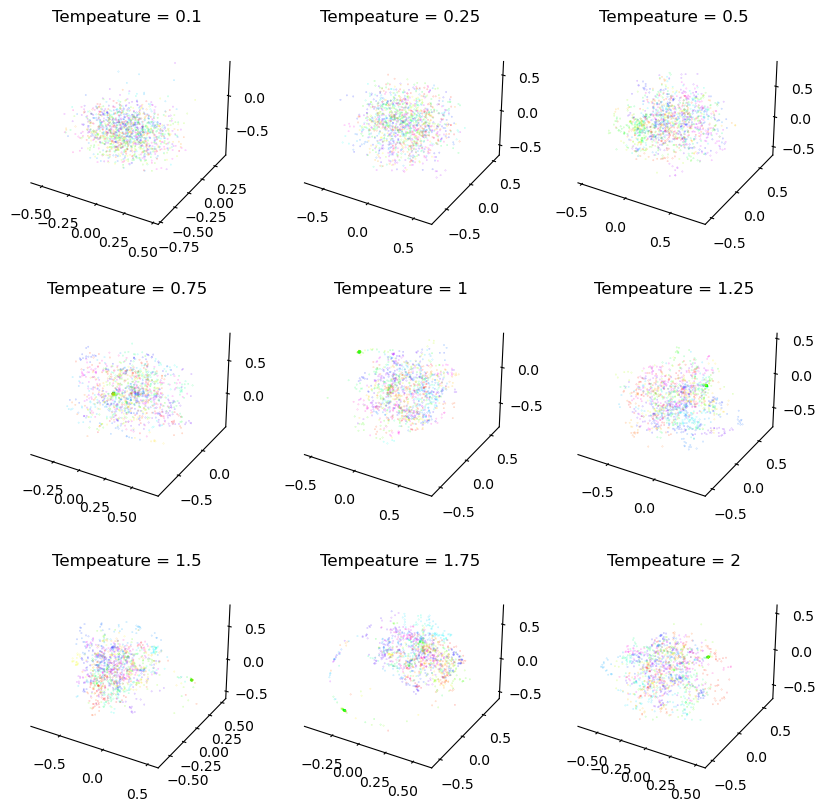

In [12]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [38]:
# Extract outcomes
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()

# Model
cebra_behavior_model_comb1 = CEBRA(model_architecture='offset10-model',
                                         learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb1.fit(X_train, y_train_comb)
cebra_behavior_model_comb1_embedding = cebra_behavior_model_comb1.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss1 = cebra_behavior_model_comb1.state_dict_['loss']

pos: -0.6597 neg:  7.5874 total:  6.9277 temperature:  1.0000: 100%|██████████| 10000/10000 [00:48<00:00, 204.35it/s]


In [39]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb1_embedding,
                                                           embedding_labels = y_train.iloc[:, 3],
                                                           title = "[Freezing, In Hidden Area]",
                                                           cmap = "crest")
fig.show()

<Figure size 500x500 with 0 Axes>

In [40]:
np.random.seed(999)
# Extract outcomes
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()

# Model_shuffled
cebra_behavior_model_comb1_shuffled = CEBRA(model_architecture='offset10-model',
                                    learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb1_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb1_embedding_shuffled = cebra_behavior_model_comb1_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss1_shuffled = cebra_behavior_model_comb1_shuffled.state_dict_['loss']

pos: -0.5796 neg:  7.6008 total:  7.0212 temperature:  1.0000: 100%|██████████| 10000/10000 [00:48<00:00, 204.44it/s]


In [41]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb1_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 3],
                                                           title = "[Freezing, In Hidden Area] shuffled",
                                                           cmap = "crest")
fig.show()

<Figure size 500x500 with 0 Axes>

In [42]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb1_embedding {animal_id}.csv"), cebra_behavior_model_comb1_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb1_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb1_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss1, os.path.join(model_dir,f"InfoNCELoss1 {animal_id}.pt"))
torch.save(InfoNCELoss1_shuffled, os.path.join(model_dir,f"InfoNCELoss1_shuffled {animal_id}.pt"))
cebra_behavior_model_comb1.save(os.path.join(model_dir,f"cebra_behavior_model_comb1 {animal_id}.pt"))
cebra_behavior_model_comb1_shuffled.save(os.path.join(model_dir,f"cebra_behavior_model_comb1_shuffled {animal_id}.pt"))

## (2). [In Food Area, Bar Press Active]

## Best Model Hyperparameters

In [43]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 2) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 2) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 2) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 2) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 2) {animal_id}.csv'), index_col=0)

In [44]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
# Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence[modelPerformence.loc[:, 'output_dimension']==3].loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
5   cosine             auto            10         NaN          0.001   

  conditional  output_dimension  num_hidden_units  max_iterations  \
5  time_delta                 3                75            7500   

   Accuracy_Testing  
5          6.683505

In [45]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1

In [46]:
y_train_comb = y_train.iloc[:, [4, 6]].to_numpy()

In [47]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb2 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb2 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb2 = cebra_behavior_model_comb2.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb2 =CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb2 = cebra_behavior_model_00001_comb2.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb2 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb2 = cebra_behavior_model_01_comb2.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb2 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb2 = cebra_behavior_model_2_comb2.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb2 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb2 = cebra_behavior_model_3_comb2.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb2 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb2 = cebra_behavior_model_5_comb2.transform(X_train)

pos: -0.6474 neg:  7.4898 total:  6.8424 temperature:  1.0000: 100%|██████████| 10000/10000 [00:49<00:00, 201.71it/s]
pos: -999.3859 neg:  1006.1250 total:  6.7390 temperature:  0.0010: 100%|██████████| 10000/10000 [00:50<00:00, 199.21it/s]
pos: -9.2640 neg:  16.0358 total:  6.7718 temperature:  0.1000: 100%|██████████| 10000/10000 [00:50<00:00, 199.28it/s]
pos: -0.3470 neg:  7.3337 total:  6.9867 temperature:  2.0000: 100%|██████████| 10000/10000 [00:56<00:00, 175.46it/s]
pos: -0.2363 neg:  7.2939 total:  7.0576 temperature:  3.0000: 100%|██████████| 10000/10000 [00:58<00:00, 171.41it/s]
pos: -0.1519 neg:  7.2639 total:  7.1120 temperature:  5.0000: 100%|██████████| 10000/10000 [00:54<00:00, 184.72it/s]


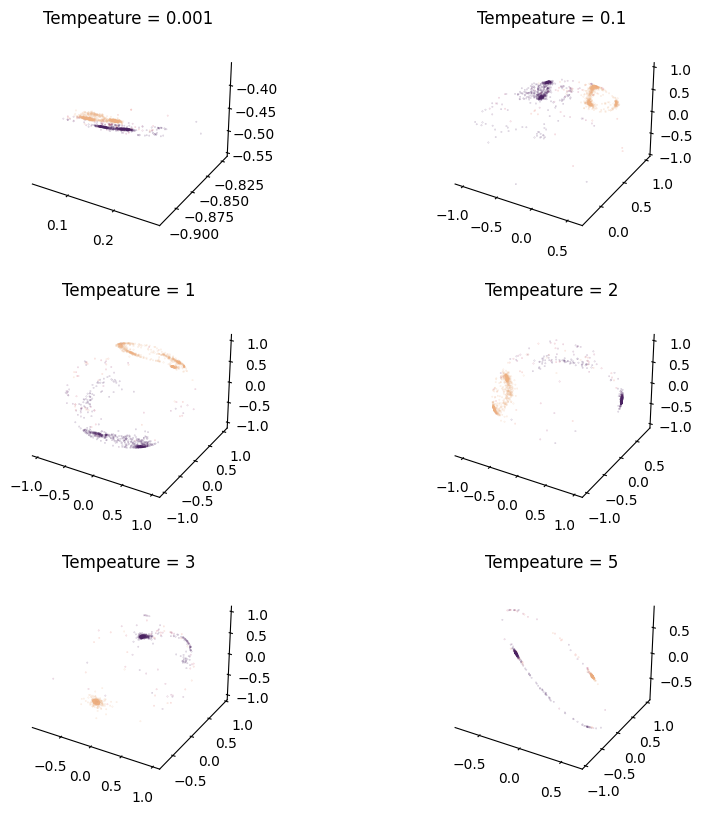

In [48]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb2,
                                                           embedding_labels = y_train.iloc[:, 4],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "flare")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb2,
                                                           embedding_labels = y_train.iloc[:, 4],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "flare")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb2,
                                                           embedding_labels = y_train.iloc[:, 4],
                                                           title = "Tempeature = 1",
                                                           cmap = "flare")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb2,
                                                           embedding_labels = y_train.iloc[:, 4],
                                                           title = "Tempeature = 2",
                                                           cmap = "flare")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb2,
                                                           embedding_labels = y_train.iloc[:, 4],
                                                           title = "Tempeature = 3",
                                                           cmap = "flare")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb2,
                                                           embedding_labels = y_train.iloc[:, 4],
                                                           title = "Tempeature = 5",
                                                           cmap = "flare")

fig.show()

In [24]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb2 = cebra_time_model_025_comb2.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb2 = cebra_time_model_05_comb2.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb2 = cebra_time_model_075_comb2.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb2 = cebra_time_model_125_comb2.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb2 = cebra_time_model_15_comb2.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb2 = cebra_time_model_175_comb2.transform(X_train)

pos: -2.2922 neg:  8.5247 total:  6.2326 temperature:  0.2500: 100%|██████████| 10000/10000 [00:45<00:00, 218.38it/s]
pos: -1.0783 neg:  7.6634 total:  6.5851 temperature:  0.5000: 100%|██████████| 10000/10000 [00:45<00:00, 217.93it/s]
pos: -0.7356 neg:  7.4777 total:  6.7422 temperature:  0.7500: 100%|██████████| 10000/10000 [00:46<00:00, 213.62it/s]
pos: -0.4821 neg:  7.3803 total:  6.8982 temperature:  1.2500: 100%|██████████| 10000/10000 [00:46<00:00, 216.86it/s]
pos: -0.4265 neg:  7.3586 total:  6.9321 temperature:  1.5000: 100%|██████████| 10000/10000 [00:45<00:00, 218.01it/s]
pos: -0.3683 neg:  7.3482 total:  6.9800 temperature:  1.7500: 100%|██████████| 10000/10000 [00:46<00:00, 217.33it/s]


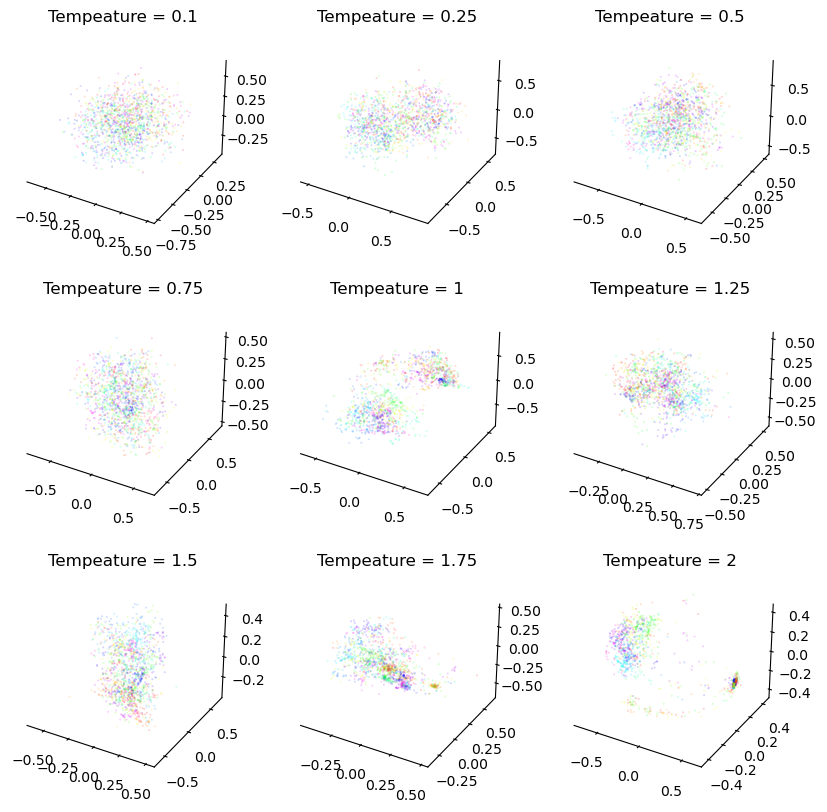

In [25]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [59]:
# Extract outcomes
y_train_comb = y_train.iloc[:, [4, 6]].to_numpy()

# Model
cebra_behavior_model_comb2 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb2.fit(X_train, y_train_comb)
cebra_behavior_model_comb2_embedding = cebra_behavior_model_comb2.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss2 = cebra_behavior_model_comb2.state_dict_['loss']

pos: -0.6383 neg:  7.4943 total:  6.8560 temperature:  1.0000: 100%|██████████| 10000/10000 [00:56<00:00, 176.73it/s]


In [60]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb2_embedding,
                                                           embedding_labels = y_train.iloc[:, 4],
                                                           title = "[In Food Area, Bar Press Active]",
                                                           cmap = "flare")
fig.show()

<Figure size 500x500 with 0 Axes>

In [61]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb2_shuffled = CEBRA(model_architecture='offset10-model',
                                    learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb2_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb2_embedding_shuffled = cebra_behavior_model_comb2_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss2_shuffled = cebra_behavior_model_comb2_shuffled.state_dict_['loss']

pos: -0.5861 neg:  7.5690 total:  6.9829 temperature:  1.0000: 100%|██████████| 10000/10000 [00:54<00:00, 181.95it/s]


In [62]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb2_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 4],
                                                           title = "[In Food Area, Bar Press Active] shuffled",
                                                           cmap = "flare")
fig.show()

<Figure size 500x500 with 0 Axes>

In [63]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb2_embedding {animal_id}.csv"), cebra_behavior_model_comb2_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb2_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb2_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss2, os.path.join(model_dir,f"InfoNCELoss2 {animal_id}.pt"))
torch.save(InfoNCELoss2_shuffled, os.path.join(model_dir,f"InfoNCELoss2_shuffled {animal_id}.pt"))
cebra_behavior_model_comb2.save(os.path.join(model_dir,f"cebra_behavior_model_comb2 {animal_id}.pt"))
cebra_behavior_model_comb2_shuffled.save(os.path.join(model_dir,f"cebra_behavior_model_comb2_shuffled {animal_id}.pt"))

## (3). [Tone Active]

In [3]:
# source_dir_tone_only = "/scratch/09656/dhh3/cebra/cebra_behavior/Cat_odor_conflict/training/data2"
# output_dir_tone_only = "/scratch/09656/dhh3/cebra/cebra_behavior/Cat_odor_conflict/training/output2"
# model_dir_tone_only = "/scratch/09656/dhh3/cebra/cebra_behavior/Cat_odor_conflict/visualization2/models"

# Dt_tone_only = pd.read_csv(os.path.join(source_dir_tone_only, f'{animal_id}.csv'), index_col= 0)
# # Split
# Y_tone_only = Dt_tone_only.iloc[:, 0:9]
# X_tone_only = Dt_tone_only.iloc[:, 9:]

# # Train test split
# X_train_tone_only, X_test_tone_only, y_train_tone_only, y_test_tone_only = train_test_split(X_tone_only, Y_tone_only, test_size = 0.2, random_state = 2024)

# # Sort dataset by row index
# X_train_tone_only = X_train_tone_only.sort_index()
# X_test_tone_only = X_test_tone_only.sort_index()
# y_train_tone_only = y_train_tone_only.sort_index()
# y_test_tone_only = y_test_tone_only.sort_index()

## Best Model Hyperparameters

In [87]:
# res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 3) {animal_id}.csv'), index_col=0)
# res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 3) {animal_id}.csv'), index_col=0)
# res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 3) {animal_id}.csv'), index_col=0)
# res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 3) {animal_id}.csv'), index_col=0)
# res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 3) {animal_id}.csv'), index_col=0)

res0 = pd.read_csv(os.path.join(output_dir_tone_only, f'CEBRA_Behavior Training Results 0 (1) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir_tone_only, f'CEBRA_Behavior Training Results 1 (1) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir_tone_only, f'CEBRA_Behavior Training Results 2 (1) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir_tone_only, f'CEBRA_Behavior Training Results 3 (1) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir_tone_only, f'CEBRA_Behavior Training Results 4 (1) {animal_id}.csv'), index_col=0)
res5 = pd.read_csv(os.path.join(output_dir_tone_only, f'CEBRA_Behavior Training Results 5 (1) {animal_id}.csv'), index_col=0)
res6 = pd.read_csv(os.path.join(output_dir_tone_only, f'CEBRA_Behavior Training Results 6 (1) {animal_id}.csv'), index_col=0)
res7 = pd.read_csv(os.path.join(output_dir_tone_only, f'CEBRA_Behavior Training Results 7 (1) {animal_id}.csv'), index_col=0)
res8 = pd.read_csv(os.path.join(output_dir_tone_only, f'CEBRA_Behavior Training Results 8 (1) {animal_id}.csv'), index_col=0)
res9 = pd.read_csv(os.path.join(output_dir_tone_only, f'CEBRA_Behavior Training Results 9 (1) {animal_id}.csv'), index_col=0)

In [88]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4, res5, res6, res7, res8, res9])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence[modelPerformence.loc[:, 'output_dimension']==3].loc[:, 'Accuracy_Testing'])

# Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
3   cosine             auto            10         NaN          0.001   

  conditional  output_dimension  num_hidden_units  max_iterations  \
3  time_delta                 3                32            7500   

   Accuracy_Testing  
3          6.885068

In [66]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1

In [68]:
y_train_comb = y_train.iloc[:, [8]].to_numpy()

In [70]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb3 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb3 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb3 = cebra_behavior_model_comb3.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb3 =CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb3 = cebra_behavior_model_00001_comb3.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb3 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb3 = cebra_behavior_model_01_comb3.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb3 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb3 = cebra_behavior_model_2_comb3.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb3 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb3 = cebra_behavior_model_3_comb3.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb3 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb3 = cebra_behavior_model_5_comb3.transform(X_train)

  0%|          | 0/10000 [00:00<?, ?it/s]/work/09117/xz6783/ls6/Anaconda/envs/cebra/lib/python3.8/site-packages/torch/nn/modules/conv.py:306: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/work/09117/xz6783/ls6/Anaconda/envs/cebra/lib/python3.8/site-packages/torch/autograd/graph.py:744: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

pos: -0.5970 neg:  7.6151 total:  7.0180 temperature:  1.0000: 100%|██████████| 10000/10000 [00:55<00:00, 180.71it/s]
pos: -999.3624 neg:  1006.2274 total:  6.8650 temperature:  0.0010: 100%|██████████| 10000/10000 [00:51<00:00, 192.57it/s]
pos: -9.3525 neg:  16.2474 total:  6.8948 t

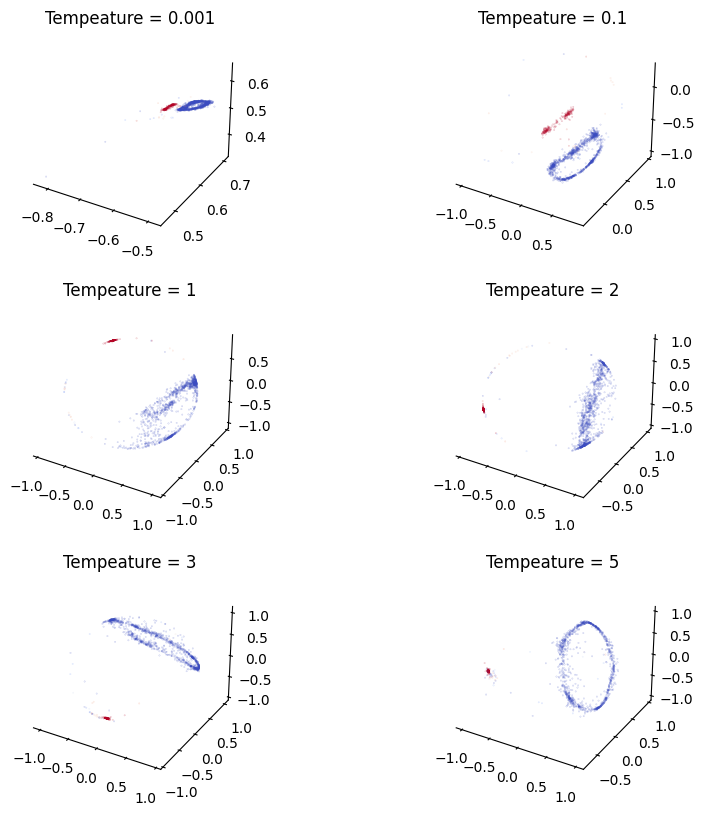

In [72]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb3,
                                                           embedding_labels = y_train.iloc[:, 8],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "coolwarm")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb3,
                                                           embedding_labels = y_train.iloc[:, 8],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "coolwarm")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb3,
                                                           embedding_labels = y_train.iloc[:, 8],
                                                           title = "Tempeature = 1",
                                                           cmap = "coolwarm")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb3,
                                                           embedding_labels = y_train.iloc[:, 8],
                                                           title = "Tempeature = 2",
                                                           cmap = "coolwarm")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb3,
                                                           embedding_labels = y_train.iloc[:, 8],
                                                           title = "Tempeature = 3",
                                                           cmap = "coolwarm")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb3,
                                                           embedding_labels = y_train.iloc[:, 8],
                                                           title = "Tempeature = 5",
                                                           cmap = "coolwarm")

fig.show()

In [10]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb3.fit(X_train_tone_only, y_train_comb)
# Extract embedding vector
embedding_025_comb3 = cebra_time_model_025_comb3.transform(X_train_tone_only)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb3.fit(X_train_tone_only, y_train_comb)
# Extract embedding vector
embedding_05_comb3 = cebra_time_model_05_comb3.transform(X_train_tone_only)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb3.fit(X_train_tone_only, y_train_comb)
# Extract embedding vector
embedding_075_comb3 = cebra_time_model_075_comb3.transform(X_train_tone_only)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb3.fit(X_train_tone_only, y_train_comb)
# Extract embedding vector
embedding_125_comb3 = cebra_time_model_125_comb3.transform(X_train_tone_only)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb3.fit(X_train_tone_only, y_train_comb)
# Extract embedding vector
embedding_15_comb3 = cebra_time_model_15_comb3.transform(X_train_tone_only)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb3.fit(X_train_tone_only, y_train_comb)
# Extract embedding vector
embedding_175_comb3 = cebra_time_model_175_comb3.transform(X_train_tone_only)

pos: -2.4110 neg:  8.8428 total:  6.4318 temperature:  0.2500: 100%|██████████| 10000/10000 [00:46<00:00, 216.62it/s]
pos: -1.0752 neg:  7.8411 total:  6.7658 temperature:  0.5000: 100%|██████████| 10000/10000 [00:44<00:00, 224.80it/s]
pos: -0.6935 neg:  7.5797 total:  6.8862 temperature:  0.7500: 100%|██████████| 10000/10000 [00:45<00:00, 219.99it/s]
pos: -0.3867 neg:  7.4049 total:  7.0183 temperature:  1.2500: 100%|██████████| 10000/10000 [00:44<00:00, 226.94it/s]
pos: -0.3267 neg:  7.3773 total:  7.0506 temperature:  1.5000: 100%|██████████| 10000/10000 [00:43<00:00, 227.76it/s]
pos: -0.2793 neg:  7.3517 total:  7.0723 temperature:  1.7500: 100%|██████████| 10000/10000 [00:43<00:00, 227.99it/s]


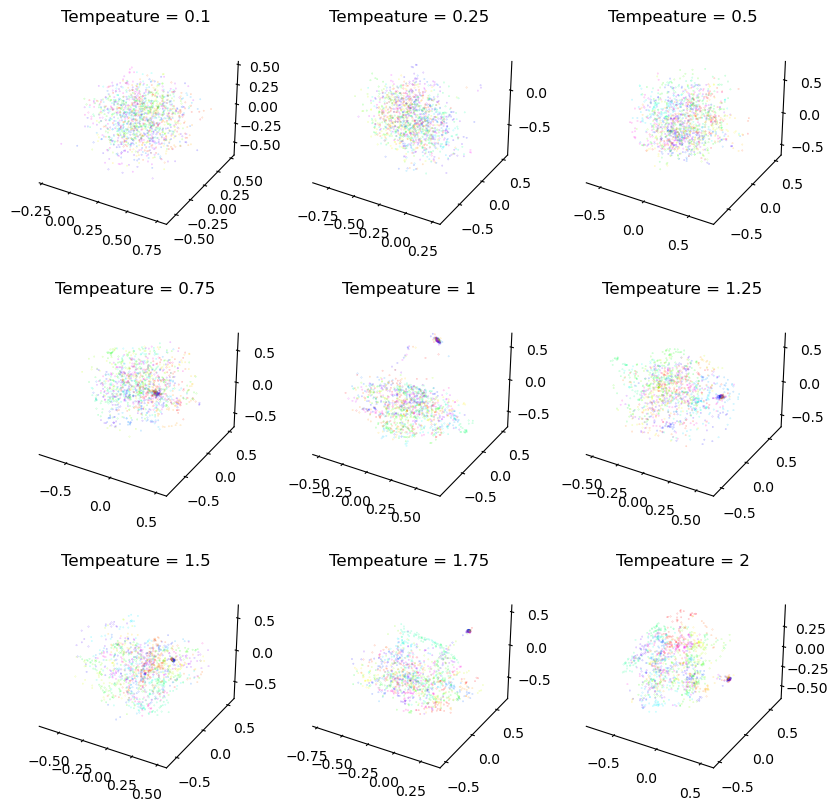

In [11]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb3,
                                                           embedding_labels = y_train_tone_only.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb3,
                                                           embedding_labels = y_train_tone_only.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb3,
                                                           embedding_labels = y_train_tone_only.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb3,
                                                           embedding_labels = y_train_tone_only.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb3,
                                                           embedding_labels = y_train_tone_only.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb3,
                                                           embedding_labels = y_train_tone_only.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb3,
                                                           embedding_labels = y_train_tone_only.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb3,
                                                           embedding_labels = y_train_tone_only.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb3,
                                                           embedding_labels = y_train_tone_only.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [73]:
# Model
cebra_behavior_model_comb3 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb3.fit(X_train, y_train_comb)
cebra_behavior_model_comb3_embedding = cebra_behavior_model_comb3.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss3 = cebra_behavior_model_comb3.state_dict_['loss']

pos: -0.6014 neg:  7.6221 total:  7.0208 temperature:  1.0000: 100%|██████████| 10000/10000 [00:53<00:00, 185.64it/s]


In [75]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb3_embedding,
                                                           embedding_labels = y_train.iloc[:, 8],
                                                           title = "[Tone Active]",
                                                           cmap = "coolwarm")
fig.show()

<Figure size 500x500 with 0 Axes>

In [89]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb3_shuffled = CEBRA(model_architecture='offset10-model',
                                    learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb3_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb3_embedding_shuffled = cebra_behavior_model_comb3_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss3_shuffled = cebra_behavior_model_comb3_shuffled.state_dict_['loss']

pos: -0.5514 neg:  7.5891 total:  7.0377 temperature:  1.0000: 100%|██████████| 10000/10000 [00:48<00:00, 207.44it/s]


In [90]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb3_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 8],
                                                           title = "[Tone Active] shuffled",
                                                           cmap = "coolwarm")
fig.show()

<Figure size 500x500 with 0 Axes>

In [91]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb3_embedding {animal_id}.csv"), cebra_behavior_model_comb3_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb3_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb3_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss3, os.path.join(model_dir,f"InfoNCELoss3 {animal_id}.pt"))
torch.save(InfoNCELoss3_shuffled, os.path.join(model_dir,f"InfoNCELoss3_shuffled {animal_id}.pt"))
cebra_behavior_model_comb3.save(os.path.join(model_dir,f"cebra_behavior_model_comb3 {animal_id}.pt"))
cebra_behavior_model_comb3_shuffled.save(os.path.join(model_dir,f"cebra_behavior_model_comb3_shuffled {animal_id}.pt"))

## (4). [Speed]

## Best Model Hyperparameters

In [121]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 4) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 4) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 4) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 4) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 4) {animal_id}.csv'), index_col=0)

In [122]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence[modelPerformence.loc[:, 'output_dimension']==3].loc[:, 'Accuracy_Testing'])
# Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
5   cosine             auto            10         NaN         0.0001   

  conditional  output_dimension  num_hidden_units  max_iterations  \
5  time_delta                 3                75            7500   

   Accuracy_Testing  
5          7.000692

In [123]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1
y_train_comb = y_train.iloc[:, [2]].to_numpy()

In [95]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb4 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb4 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb4 = cebra_behavior_model_comb4.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb4 =CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb4 = cebra_behavior_model_00001_comb4.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb4 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb4 = cebra_behavior_model_01_comb4.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb4 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb4 = cebra_behavior_model_2_comb4.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb4 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb4 = cebra_behavior_model_3_comb4.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb4 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb4 = cebra_behavior_model_5_comb4.transform(X_train)

pos: -0.5495 neg:  7.5593 total:  7.0099 temperature:  1.0000: 100%|██████████| 10000/10000 [00:50<00:00, 199.90it/s]
pos: -999.4268 neg:  1006.3970 total:  6.9702 temperature:  0.0010: 100%|██████████| 10000/10000 [00:50<00:00, 199.49it/s]
pos: -9.3672 neg:  16.3249 total:  6.9577 temperature:  0.1000: 100%|██████████| 10000/10000 [00:50<00:00, 199.50it/s]
pos: -0.2599 neg:  7.3355 total:  7.0756 temperature:  2.0000: 100%|██████████| 10000/10000 [00:50<00:00, 199.37it/s]
pos: -0.1611 neg:  7.2956 total:  7.1346 temperature:  3.0000: 100%|██████████| 10000/10000 [00:50<00:00, 199.40it/s]
pos: -0.1045 neg:  7.2663 total:  7.1618 temperature:  5.0000: 100%|██████████| 10000/10000 [00:50<00:00, 199.29it/s]


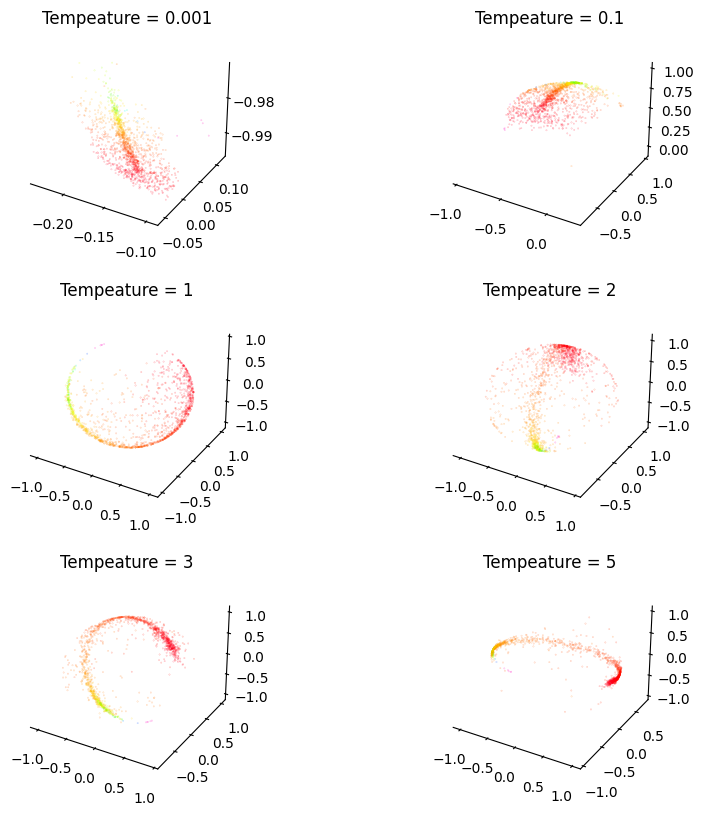

In [96]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb4,
                                                           embedding_labels = y_train.iloc[:, 2],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb4,
                                                           embedding_labels = y_train.iloc[:, 2],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb4,
                                                           embedding_labels = y_train.iloc[:, 2],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb4,
                                                           embedding_labels = y_train.iloc[:, 2],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb4,
                                                           embedding_labels = y_train.iloc[:, 2],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb4,
                                                           embedding_labels = y_train.iloc[:, 2],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [50]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb4 = cebra_time_model_025_comb4.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb4 = cebra_time_model_05_comb4.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb4 = cebra_time_model_075_comb4.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb4 = cebra_time_model_125_comb4.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb4 = cebra_time_model_15_comb4.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb4 = cebra_time_model_175_comb4.transform(X_train)

pos: -2.4137 neg:  9.2299 total:  6.8162 temperature:  0.2500: 100%|██████████| 10000/10000 [00:41<00:00, 238.49it/s]
pos: -0.9775 neg:  7.8764 total:  6.8989 temperature:  0.5000: 100%|██████████| 10000/10000 [00:41<00:00, 240.19it/s]
pos: -0.6040 neg:  7.6039 total:  6.9999 temperature:  0.7500: 100%|██████████| 10000/10000 [00:41<00:00, 238.13it/s]
pos: -0.3600 neg:  7.4279 total:  7.0679 temperature:  1.2500: 100%|██████████| 10000/10000 [00:42<00:00, 233.07it/s]
pos: -0.3263 neg:  7.3927 total:  7.0664 temperature:  1.5000: 100%|██████████| 10000/10000 [00:46<00:00, 215.81it/s]
pos: -0.2923 neg:  7.3633 total:  7.0711 temperature:  1.7500: 100%|██████████| 10000/10000 [00:46<00:00, 213.66it/s]


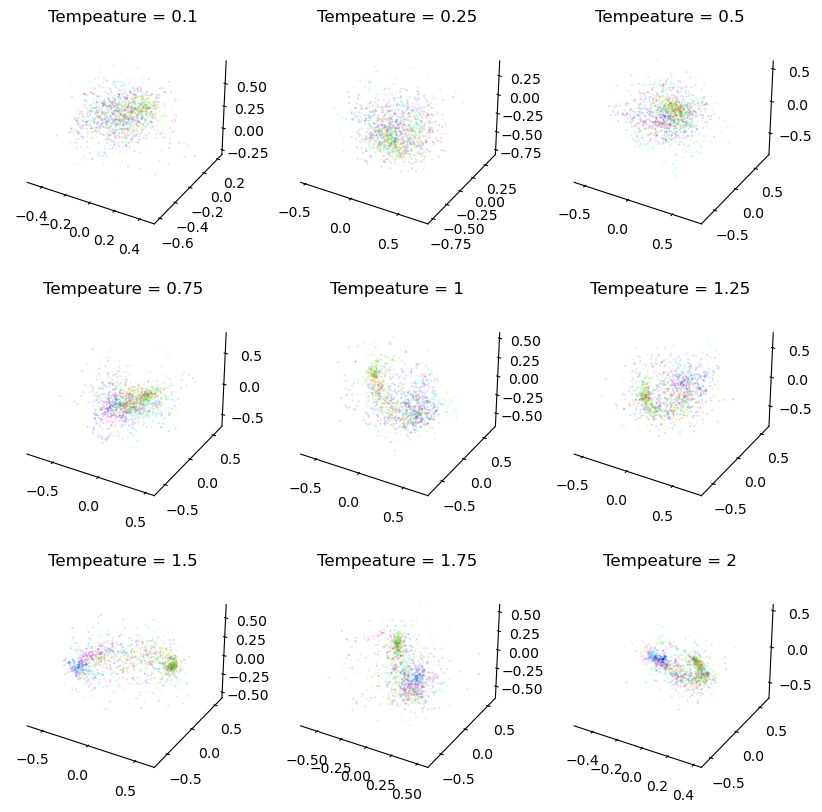

In [51]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [97]:
# Model
cebra_behavior_model_comb4 = CEBRA(model_architecture='offset10-model',
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb4.fit(X_train, y_train_comb)
cebra_behavior_model_comb4_embedding = cebra_behavior_model_comb4.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss4 = cebra_behavior_model_comb4.state_dict_['loss']

pos: -0.5754 neg:  7.5730 total:  6.9976 temperature:  1.0000: 100%|██████████| 10000/10000 [00:50<00:00, 199.34it/s]


In [98]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb4_embedding,
                                                           embedding_labels = y_train.iloc[:, 2],
                                                           title = "[Speed]",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [124]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb4_shuffled = CEBRA(model_architecture='offset10-model',
                                    learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb4_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb4_embedding_shuffled = cebra_behavior_model_comb4_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss4_shuffled = cebra_behavior_model_comb4_shuffled.state_dict_['loss']

pos: -0.5687 neg:  7.6147 total:  7.0460 temperature:  1.0000: 100%|██████████| 10000/10000 [00:57<00:00, 172.65it/s]


In [125]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb4_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 2],
                                                           title = "[Speed] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [126]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb4_embedding {animal_id}.csv"), cebra_behavior_model_comb4_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb4_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb4_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss4, os.path.join(model_dir,f"InfoNCELoss4 {animal_id}.pt"))
torch.save(InfoNCELoss4_shuffled, os.path.join(model_dir,f"InfoNCELoss4_shuffled {animal_id}.pt"))
cebra_behavior_model_comb4.save(os.path.join(model_dir,f"cebra_behavior_model_comb4 {animal_id}.pt"))
cebra_behavior_model_comb4_shuffled.save(os.path.join(model_dir,f"cebra_behavior_model_comb4_shuffled {animal_id}.pt"))

# 4. Model evaluation

In [11]:
InfoNCELoss1 = torch.load(os.path.join(model_dir, f"InfoNCELoss1 {animal_id}.pt"))
InfoNCELoss1_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss1_shuffled {animal_id}.pt"))
InfoNCELoss2 = torch.load(os.path.join(model_dir, f"InfoNCELoss2 {animal_id}.pt"))
InfoNCELoss2_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss2_shuffled {animal_id}.pt"))
InfoNCELoss3 = torch.load(os.path.join(model_dir, f"InfoNCELoss3 {animal_id}.pt"))
InfoNCELoss3_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss3_shuffled {animal_id}.pt"))
InfoNCELoss4 = torch.load(os.path.join(model_dir, f"InfoNCELoss4 {animal_id}.pt"))
InfoNCELoss4_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss4_shuffled {animal_id}.pt"))

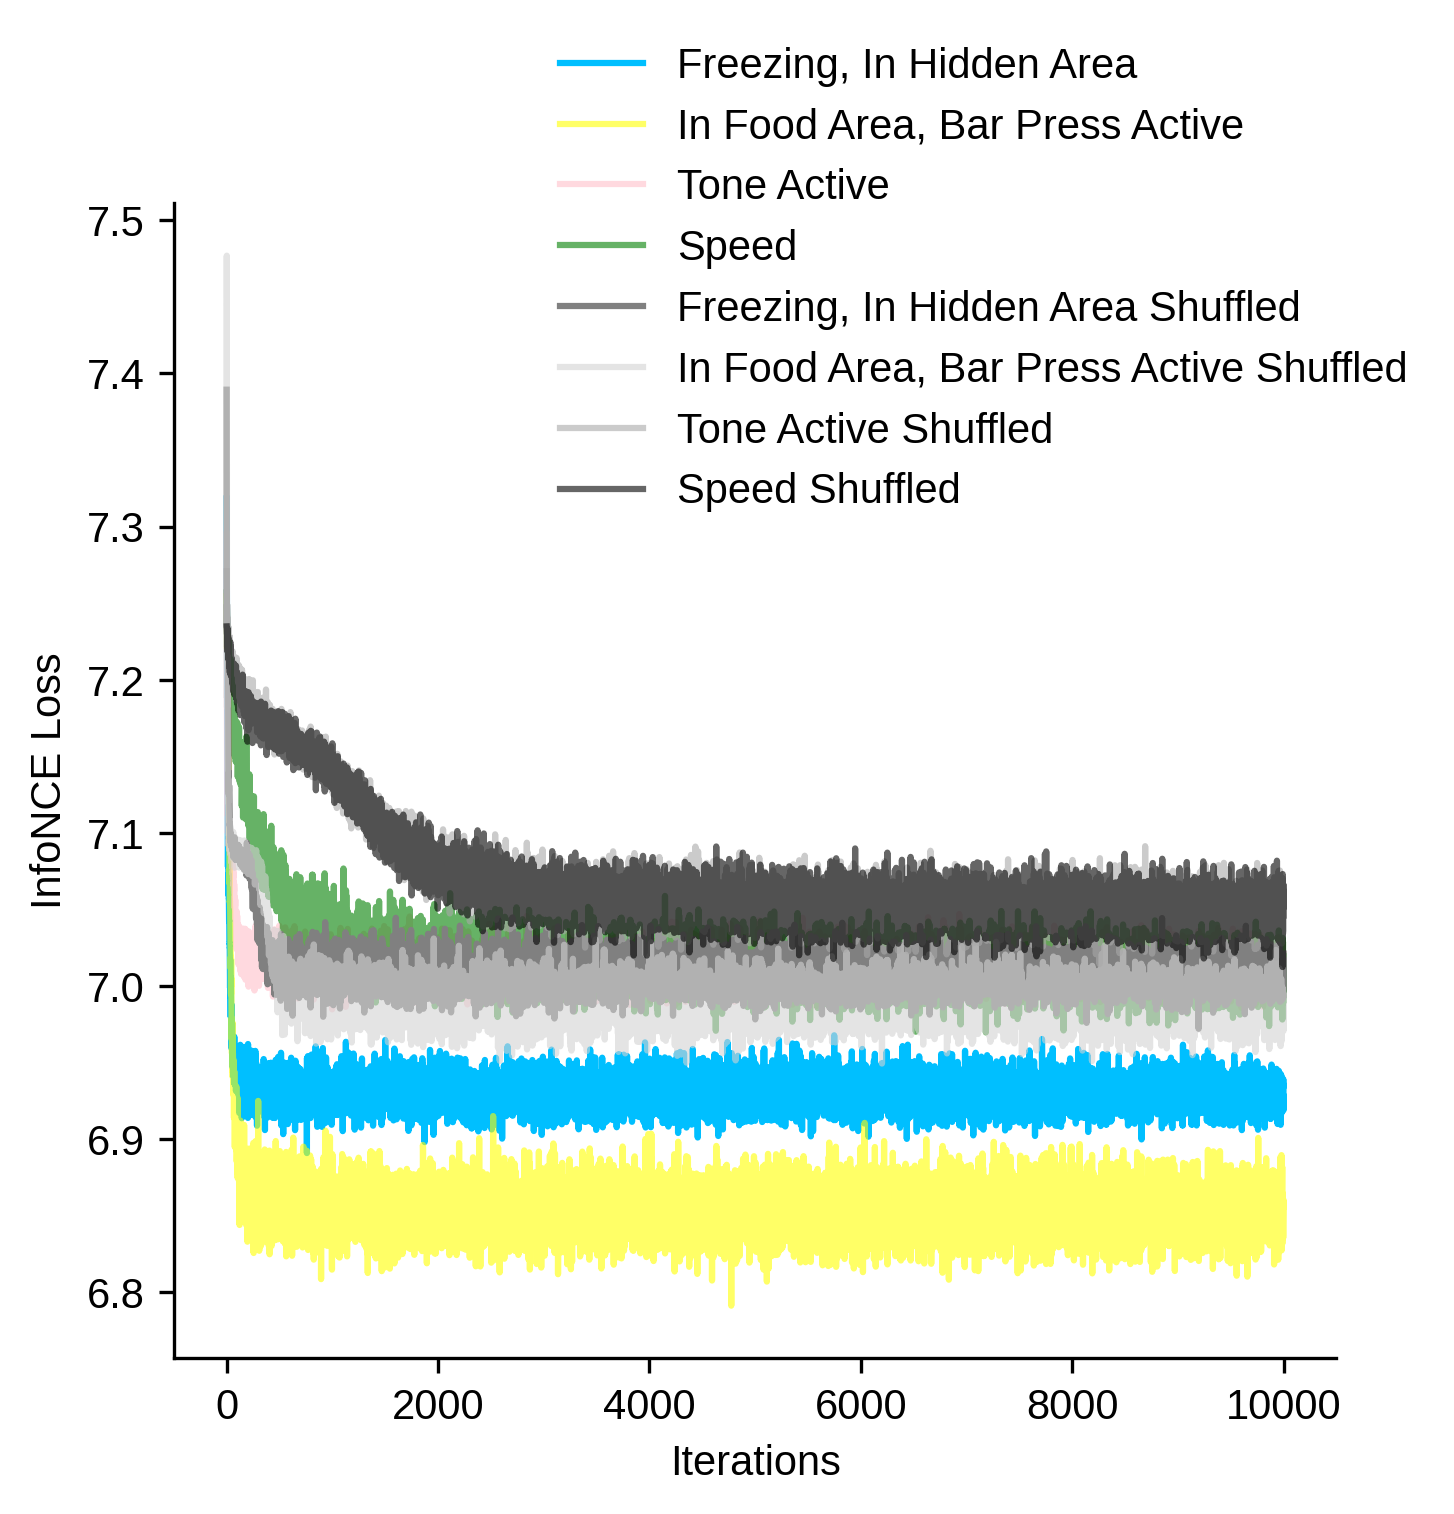

In [12]:
fig = plt.figure(figsize=(5,5), dpi = 300)
ax = plt.subplot(111)
ax.plot(InfoNCELoss1, c='deepskyblue', label = 'Freezing, In Hidden Area')
ax.plot(InfoNCELoss2, c='yellow', alpha = 0.6, label = 'In Food Area, Bar Press Active')
ax.plot(InfoNCELoss3, c='pink', alpha=0.6,label = 'Tone Active')
ax.plot(InfoNCELoss4, c='green', alpha=0.6,label = 'Speed')
ax.plot(InfoNCELoss1_shuffled, c='gray', label = 'Freezing, In Hidden Area Shuffled')
ax.plot(InfoNCELoss2_shuffled, c='lightgray', alpha = 0.6, label = 'In Food Area, Bar Press Active Shuffled')
ax.plot(InfoNCELoss3_shuffled, c='darkgray', alpha=0.6,label = 'Tone Active Shuffled')
ax.plot(InfoNCELoss4_shuffled, c='black', alpha=0.6,label = 'Speed Shuffled')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Iterations')
ax.set_ylabel('InfoNCE Loss')
plt.legend(bbox_to_anchor=(0.3,0.7), frameon = False )
plt.show()

In [13]:
cebra_behavior_model_comb1_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb1_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb2_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb2_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb3_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb3_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb4_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb4_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb1_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb1_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb2_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb2_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb3_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb3_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb4_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb4_embedding_shuffled {animal_id}.csv"), delimiter = ',')


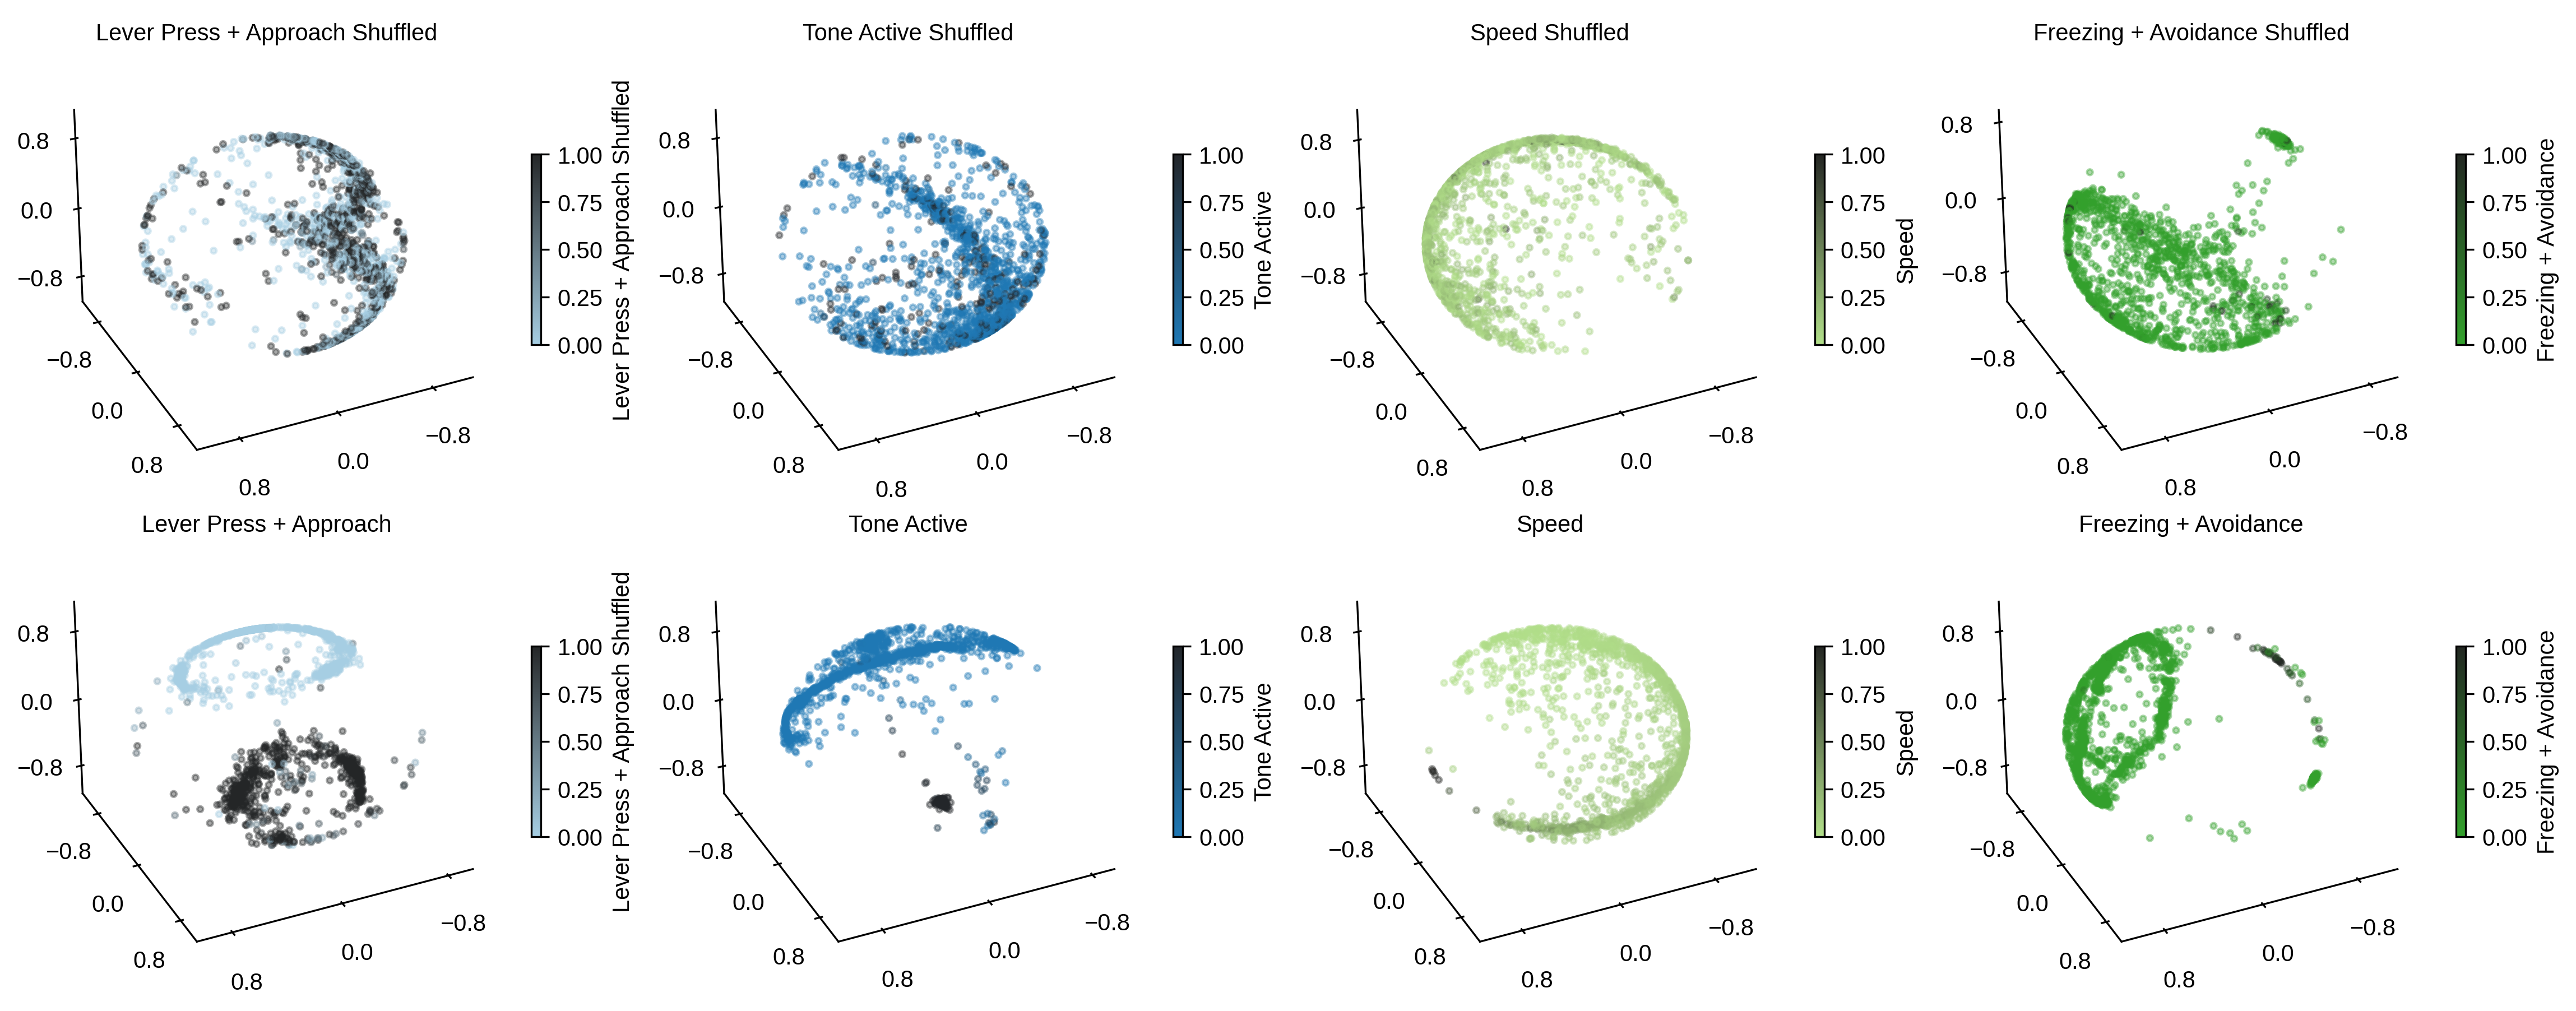

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np

fig = plt.figure(figsize=(16,6), dpi=300)
ax1=plt.subplot(241, projection = '3d')
ax2=plt.subplot(242, projection = '3d')
ax3=plt.subplot(243, projection = '3d')
ax4=plt.subplot(244, projection = '3d')
ax5=plt.subplot(245, projection = '3d')
ax6=plt.subplot(246, projection = '3d')
ax7=plt.subplot(247, projection = '3d')
ax8=plt.subplot(248, projection = '3d')

colors = sns.color_palette('Paired', 8 // 2)

# Example function to create a dummy colorbar
def add_dummy_colorbar(ax, cmap, title):
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction = 0.015)
    cbar.set_label(title)

# Plot embeddings


ax1 = cebra.plot_embedding(ax=ax1, embedding=cebra_behavior_model_comb2_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 4],
                                                           title = "Lever Press + Approach Shuffled",
                                                           cmap = sns.dark_palette(colors[0], reverse=True, as_cmap=True), markersize= 6)

ax2 = cebra.plot_embedding(ax=ax2, embedding=cebra_behavior_model_comb3_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 8],
                                                           title = "Tone Active Shuffled",
                                                           cmap = sns.dark_palette(colors[1], reverse=True, as_cmap=True), markersize= 6)

ax3 = cebra.plot_embedding(ax=ax3, embedding=cebra_behavior_model_comb4_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 2],
                                                           title = "Speed Shuffled",
                                                           cmap = sns.dark_palette(colors[2], reverse=True, as_cmap=True), markersize= 6)

ax4 = cebra.plot_embedding(ax=ax4, embedding=cebra_behavior_model_comb1_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 3],
                                                           title = "Freezing + Avoidance Shuffled",
                                                           cmap = sns.dark_palette(colors[3], reverse=True, as_cmap=True), markersize= 6)


ax5 = cebra.plot_embedding(ax=ax5, embedding=cebra_behavior_model_comb2_embedding,
                                                           embedding_labels = y_train.iloc[:, 4],
                                                           title = "Lever Press + Approach",
                                                           cmap = sns.dark_palette(colors[0], reverse=True, as_cmap=True), markersize= 6)

ax6 = cebra.plot_embedding(ax=ax6, embedding=cebra_behavior_model_comb3_embedding,
                                                           embedding_labels = y_train.iloc[:, 8],
                                                           title = "Tone Active",
                                                           cmap = sns.dark_palette(colors[1], reverse=True, as_cmap=True), markersize= 6)
ax7 = cebra.plot_embedding(ax=ax7, embedding=cebra_behavior_model_comb4_embedding,
                                                           embedding_labels = y_train.iloc[:, 2],
                                                           title = "Speed",
                                                           cmap = sns.dark_palette(colors[2], reverse=True, as_cmap=True), markersize= 6)

ax8 = cebra.plot_embedding(ax=ax8, embedding=cebra_behavior_model_comb1_embedding,
                                                           embedding_labels = y_train.iloc[:, 3],
                                                           title = "Freezing + Avoidance",
                                                           cmap = sns.dark_palette(colors[3], reverse=True, as_cmap=True), markersize= 6)

add_dummy_colorbar(ax1, sns.dark_palette(colors[0], reverse=True, as_cmap=True), "Lever Press + Approach Shuffled")

add_dummy_colorbar(ax5, sns.dark_palette(colors[0], reverse=True, as_cmap=True), "Lever Press + Approach Shuffled")

add_dummy_colorbar(ax2, sns.dark_palette(colors[1], reverse=True, as_cmap=True), "Tone Active")
add_dummy_colorbar(ax6, sns.dark_palette(colors[1], reverse=True, as_cmap=True), "Tone Active")

add_dummy_colorbar(ax3, sns.dark_palette(colors[2], reverse=True, as_cmap=True), "Speed")
add_dummy_colorbar(ax7, sns.dark_palette(colors[2], reverse=True, as_cmap=True), "Speed")

add_dummy_colorbar(ax4, sns.dark_palette(colors[3], reverse=True, as_cmap=True), "Freezing + Avoidance")
add_dummy_colorbar(ax8, sns.dark_palette(colors[3], reverse=True, as_cmap=True), "Freezing + Avoidance")


for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.xaxis.set_major_locator(MaxNLocator(3))
    ax.yaxis.set_major_locator(MaxNLocator(3))
    ax.zaxis.set_major_locator(MaxNLocator(3))
    ax.view_init(elev=30, azim=65)
    ax.title.set_size(10)

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.savefig("/scratch/09117/xz6783/Xu/Plots/Fig2/fig2_catodor_embedding.svg", transparent=True)

plt.show()